<a href="https://colab.research.google.com/github/priankagopi/Machine-Learning/blob/main/priyankagopi/Machine-Learning/Maize%20Flowering%20Time%20Estimation%3A%20Regression%20Analysis/Maize_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# for general dataframe editing
import pandas as pd
import numpy as np

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for pca and pcr
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
data=pd.read_sas('/content/drive/MyDrive/datasets/maize.sas7bdat')
#data = pd.read_csv("/content/drive/MyDrive/datasets/maize_data.csv", sep = ';')

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


In [ ]:
# get the shape of the data to verify the shape
data.shape

(4981, 7393)

In [ ]:
data.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [ ]:
# This is done for a reason, as there are couple of columns that have a combination of strings and floats as it's datatype
# But it entirely showcases as type String
for j in data.columns:
    if j not in ['pop','DtoA','Geno_Code','Entry']:
        for i in range(data[j].shape[0]):
            if isinstance(data[j].iloc[i],str):
                if len(data[j].iloc[i].split(','))==2:
                    data[j].iloc[i]=data[j].iloc[i].replace(',','.')
        data[j]=pd.to_numeric(data[j],errors='coerce').astype('float64')

In [ ]:
for i in range(data['DtoA'].shape[0]):
    if isinstance(data['DtoA'].iloc[i],str):
        if len(data['DtoA'].iloc[i].split(','))==2:
            data['DtoA'].iloc[i]=data['DtoA'].iloc[i].replace(',','.')

In [ ]:
data['DtoA']=pd.to_numeric(data['DtoA'],errors='coerce').astype('float64')

In [ ]:
print(data['m5'])

0       1.0
1       2.0
2       0.0
3       0.0
4       2.0
       ... 
4976    0.0
4977    2.0
4978    1.0
4979    2.0
4980    0.0
Name: m5, Length: 4981, dtype: float64


In [ ]:
data.Geno_Code.astype('category').cat.codes

0          0
1          1
2          2
3          3
4          4
        ... 
4976    4976
4977    4977
4978    4978
4979    4979
4980    4980
Length: 4981, dtype: int16

In [ ]:
data['Geno_Code']=data.Geno_Code.astype('category').cat.codes

In [ ]:
data.dtypes.unique()

array([dtype('int16'), dtype('float64')], dtype=object)

In [ ]:
# new_data3 is the data with all the data in required datatype format
# But we need to check for any null values
data.shape

(4494, 7393)

In [ ]:
data.dropna(axis=0,inplace=True)
data.shape

(4494, 7393)

In [ ]:
# Looking at the data, it seems like whent the data was cleaned , there were less than 50% data left out
# So lets look into the amount of nan's in each of the columns
data.shape

(4494, 7393)

In [ ]:
# It seems like there were an average of 489 nan/null values in each of the columns
nan_val=[]
for i in orig.columns:
    nan_val.append(orig[i].isnull().values.sum())
print(sum(nan_val)/len(nan_val))

486.7365075071013


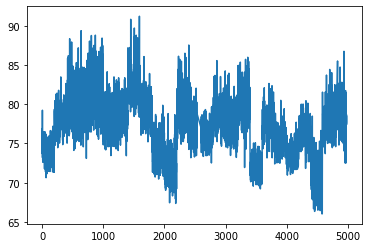

In [ ]:
# Here we are trying see the variation of DtoA for every entry in the dataset 
y1=data.DtoA.values
x1=data.Geno_Code.values 
plt.plot(x1,y1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


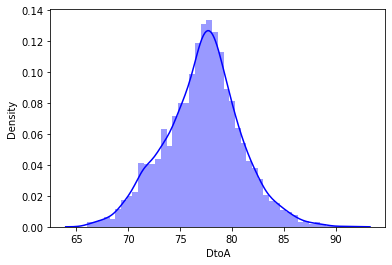

In [ ]:
# Get the dist plot for DtoA
sns.distplot(data['DtoA'],color="blue") 

In [ ]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [ ]:
correlation_threshhold = 0.015

corr = pd.DataFrame(data.corr()['DtoA'])
corr['abs'] = np.abs(corr['DtoA'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna().reset_index()
corr = corr.rename(columns={'index':'feature','DtoA':'corr'}).loc[1:]

low_correlated_features = list(corr[np.abs(corr['corr'])<=correlation_threshhold]['feature'])
data.drop(low_correlated_features,axis=1,inplace=True)
data.shape

**Data Modelling**

In [ ]:
X = data.drop('DtoA',axis=1)
y = data['DtoA']
print(X.shape,y.shape)

(4494, 7392) (4494,)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 180.0)

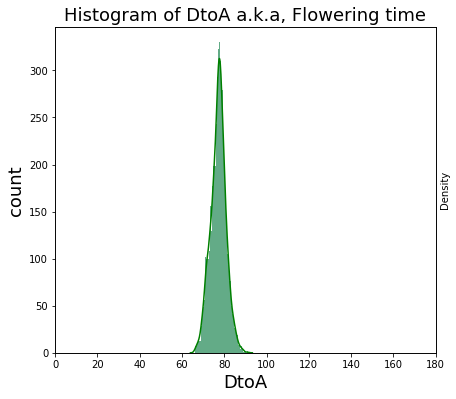

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Histogram of DtoA a.k.a, Flowering time',fontsize=18)
ax1 = sns.distplot(y, kde=False)
# Creating another Y axis
second_ax1 = ax1.twinx()
#Plotting kde without hist on the second Y axis
sns.distplot(y, ax=second_ax1, kde=True, hist=True,color="green")
#Removing Y ticks from the second axis
second_ax1.set_yticks([])
ax1.set_ylabel('count',fontsize=18)
ax1.set_xlabel('DtoA',fontsize=18)
plt.xlim(0,180)

In [ ]:
#split the data into training and test batches
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [ ]:
#normalize the data
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
print(type(scaled_X_train))
print(scaled_X_train.shape)

<class 'numpy.ndarray'>
(3145, 7392)


In [ ]:
#Linear regression
linear_model=LinearRegression()
linear_model.fit(scaled_X_train,Y_train)
Y_predicted=linear_model.predict(scaled_X_test)
print(Y_test.iloc[5:15,])
print(Y_predicted[5:15])

print("The intercept :",linear_model.intercept_)
print("\n The co-efficients are:\n",linear_model.coef_)
mse=mean_squared_error(Y_test,Y_predicted)
rmse=np.sqrt(mse)
print("The RMSE is :",rmse)
print("The R2 score:",r2_score(Y_test,Y_predicted))

4880    78.1895
1713    79.0906
2148    73.1738
4452    66.7834
1578    84.1332
3455    70.4747
3036    80.3699
2735    74.7629
3580    73.4012
2111    72.0632
Name: DtoA, dtype: float64
[62.70700757 77.12461274 72.83196479 68.93656726 78.36538232 94.17532888
 84.87806795 75.70639644 81.91285593 74.03905134]
The intercept : 77.12064464228935

 The co-efficients are:
 [-0.65593792 -0.49608933 -0.42681711 ...  0.15267091  0.15267091
  0.18377019]
The RMSE is : 6.366577400526908
The R2 score: -2.0984954047816142


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # Is a correlation calculator
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

#first let's get the required number of varibles for modelling through pearson's correlation
k=[1000,2000,4000,5000,7000]
lmse=[]
lr2=[]
for i in k:
    corr_data = SelectKBest(f_regression, k=i).fit(X, y)
    indices=corr_data.get_support()
    corr_features= X.columns.values[indices]

    corr_features_data= data.loc[:,corr_features]
    corr_feature_label=data['DtoA']

    X_train, X_test, y_train, y_test = train_test_split(corr_features_data,corr_feature_label, test_size=0.2, random_state=1)

    corr_regr = RandomForestRegressor()

    corr_reg = corr_regr.fit(X_train,y_train)
    corr_pred = corr_regr.predict(X_test)

    #Get the required metric to understand performance of the trained model
    R2 = r2_score(y_test, corr_pred)
    mse = mean_squared_error(y_test, corr_pred)
    acc = 100*max(0,mse)
    lmse.append(mse)
    lr2.append(R2)

    table=pd.DataFrame({'cols':['R2','MSE'],'val':[R2,mse]})
    print(table)

print(lmse)
print(lr2)

  cols       val
0   R2  0.748480
1  MSE  3.471469
  cols       val
0   R2  0.756419
1  MSE  3.361900
  cols       val
0   R2  0.771913
1  MSE  3.148047
  cols       val
0   R2  0.774176
1  MSE  3.116818
  cols       val
0   R2  0.769297
1  MSE  3.184150
[3.4714692640415814, 3.3619003205070297, 3.1480466670534617, 3.116817908064382, 3.1841501043871183]
[0.7484800814750311, 0.7564187292505244, 0.7719131638549336, 0.7741757951269226, 0.7692973453279792]


In [ ]:
RidgeReg = Ridge(alpha=0.01)
RidgeReg.fit(X_train, y_train) 
Y_pred_train= RidgeReg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,Y_pred_train)))
print(r2_score(y_train, Y_pred_train))

Y_pred_test= RidgeReg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,Y_pred_test))) 
print(r2_score(y_test, Y_pred_test))

ValueError: ignored

In [ ]:
corr_mat = data.corr()
corr_mat

,Geno_Code,pop,m1,m2,m3,m4,m5,m6,m7,m8,...,m7264,m7265,m7266,m7267,m7268,m7269,m7270,m7271,m7272,DtoA
Geno_Code,1.000000,0.999206,-0.013451,-0.013422,-0.013394,-0.013399,-0.013409,-0.013419,-0.013428,-0.013438,...,-0.019159,-0.018285,-0.020289,-0.019481,-0.019921,-0.020715,-0.021080,-0.022103,-0.023618,-0.287612
pop,0.999206,1.000000,-0.013314,-0.013285,-0.013257,-0.013260,-0.013269,-0.013278,-0.013286,-0.013294,...,-0.019775,-0.018910,-0.021021,-0.020229,-0.020637,-0.021497,-0.021826,-0.022849,-0.024338,-0.287965
m1,-0.013451,-0.013314,1.000000,0.999999,0.999997,0.999988,0.999965,0.999929,0.999879,0.999814,...,0.019879,0.020081,0.021601,0.021383,0.017694,0.016762,0.016521,0.017248,0.018115,0.015460
m2,-0.013422,-0.013285,0.999999,1.000000,0.999999,0.999992,0.999971,0.999937,0.999888,0.999825,...,0.019859,0.020062,0.021581,0.021364,0.017675,0.016743,0.016501,0.017229,0.018095,0.015470
m3,-0.013394,-0.013257,0.999997,0.999999,1.000000,0.999995,0.999975,0.999942,0.999895,0.999834,...,0.019840,0.020042,0.021562,0.021344,0.017655,0.016723,0.016482,0.017209,0.018076,0.015479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m7269,-0.020715,-0.021497,0.016762,0.016743,0.016723,0.016752,0.016788,0.016824,0.016860,0.016896,...,0.953552,0.963116,0.971495,0.976781,0.988436,1.000000,0.998888,0.995582,0.989391,-0.020166
m7270,-0.021080,-0.021826,0.016521,0.016501,0.016482,0.016510,0.016547,0.016583,0.016619,0.016655,...,0.950901,0.960470,0.968903,0.974295,0.986198,0.998888,1.000000,0.998576,0.993610,-0.019817
m7271,-0.022103,-0.022849,0.017248,0.017229,0.017209,0.017238,0.017274,0.017311,0.017347,0.017382,...,0.946550,0.956113,0.964587,0.970068,0.982188,0.995582,0.998576,1.000000,0.996676,-0.018637
m7272,-0.023618,-0.024338,0.018115,0.018095,0.018076,0.018104,0.018141,0.018177,0.018213,0.018249,...,0.939850,0.949219,0.957735,0.963255,0.975514,0.989391,0.993610,0.996676,1.000000,-0.015994


In [ ]:
thres = 0.12
a = abs(corr_mat['DtoA'])
res = a[a>0.136]
res

Geno_Code    0.287612
pop          0.287965
m434         0.136208
m435         0.136972
m436         0.136267
m437         0.136537
m438         0.137570
m439         0.140707
m440         0.138553
m441         0.137693
m443         0.136460
m444         0.137056
m445         0.137757
m446         0.136362
DtoA         1.000000
Name: DtoA, dtype: float64

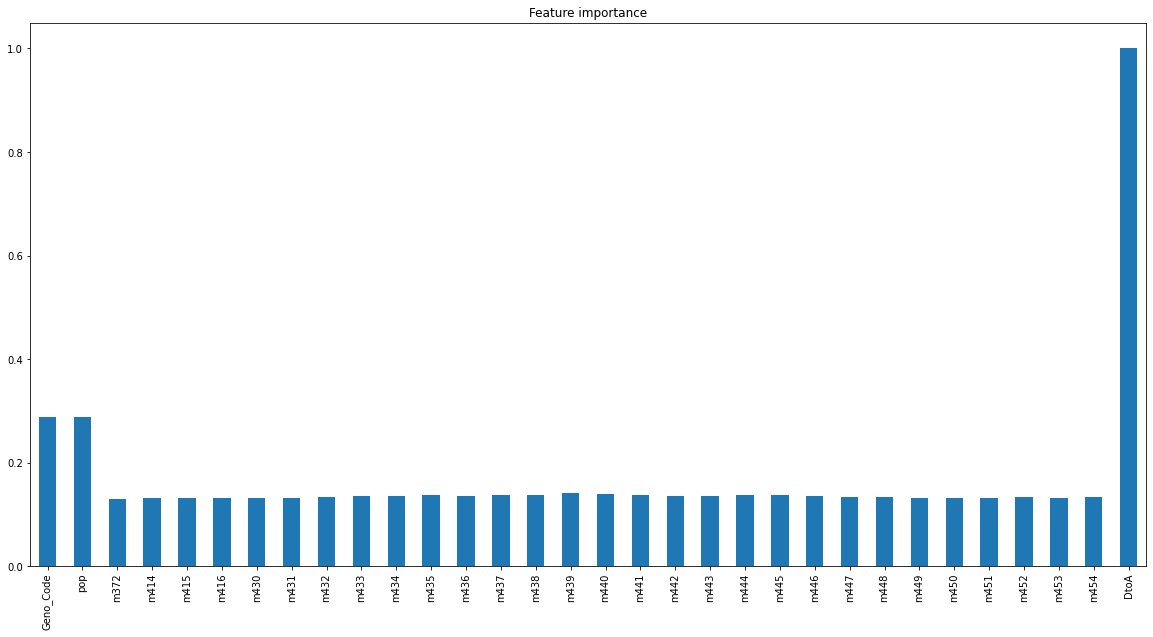

In [ ]:
p1 = res.plot(kind='bar', title='Feature importance',figsize=(20, 10))